In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rfest import splineLNP, splineLNLN
from rfest.utils import fetch_data, split_data
from rfest.utils import get_n_samples, build_design_matrix
from rfest.plot import plot2d, plot_stc2d, plot_subunits2d, plot_nonlinearity

## Load data

We use a set of spike data from V1 Complex cell from (Rust, et al., 2005) to demenstrate STC, nonparametric/parametric nonlinearities and 2D LNLN.

In [2]:
data = fetch_data(1)

(Rust, et al., 2005) is already downloaded. To re-download the same file, please set `overwrite=False`.
Loading data...
Done.


In [3]:
dt = 0.01
df = [13, 21]
dims=[16, 24]


n_samples = get_n_samples(20, dt) # 20 mins of the full dataset
stim = data['stim'].T
X = build_design_matrix(stim, dims[0])[:n_samples]
y = data['spikes_per_frm'].flatten()[:n_samples]

(X_train, y_train), (X_dev, y_dev), (X_test, y_test) = split_data(X, y, dt, frac_train=0.8, frac_dev=0.1)

SUMMARY
               N    Minutes   Fraction
Total     120000       20.0        1.0
Train      96000       16.0        0.8
Dev        12000        2.0        0.1
Test       12000        2.0        0.1


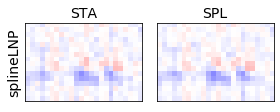

In [5]:
lnp = splineLNP(X_train, y_train, dims=dims, dt=dt, df=df)
plot2d(lnp)

STC significance test: 
  1/100
  11/100
  21/100
  31/100
  41/100
  51/100
  61/100
  71/100
  81/100
  91/100
Done.


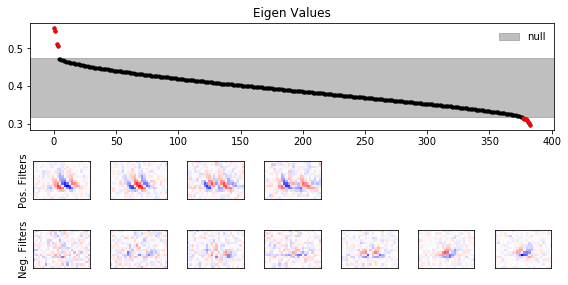

In [6]:
lnp.fit_STC(n_repeats=100, verbose=10)
plot_stc2d(lnp)

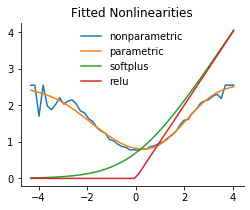

In [7]:
lnp.fit_nonparametric_nonlinearity(w=lnp.w_stc_pos[:, 1])
lnp.initialize_parametric_nonlinearity(init_to='nonparametric', method='spline', params_dict={'df': 6})
plot_nonlinearity(lnp, others=['softplus', 'relu'])

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     2.032	  6398.940	   847.516	     0.057	     0.021
  300	    29.289	-214921.758	-28224.715	     0.091	     0.063
  600	    59.114	-221505.972	-29200.685	     0.096	     0.072
  900	    88.943	-221850.004	-29275.943	     0.096	     0.073
 1200	   118.750	-221860.807	-29281.311	     0.096	     0.073
 1500	   148.682	-221861.685	-29281.385	     0.096	     0.073
 1800	   178.555	-221862.026	-29281.259	     0.096	     0.073
Stop at 1930 steps: cost (dev) has been monotonically increasing for 10 steps.

Total time elapsed: 191.477 s.


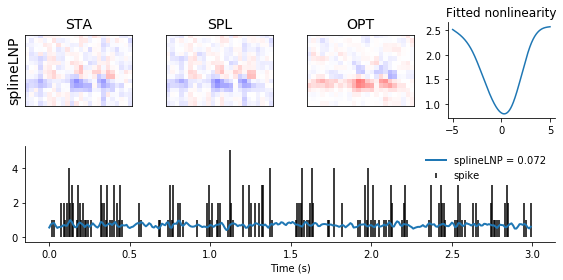

In [10]:
lnp.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
         num_iters=3000, verbose=300, beta=0.25, step_size=0.1, fit_nonlinearity=False)
plot2d(lnp, X_test, y_test, dt=dt, len_time=3)

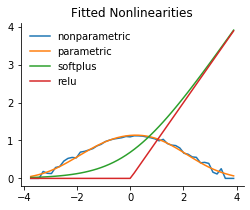

In [11]:
lnp.fit_nonparametric_nonlinearity(w=lnp.w_stc_neg[:, -1])
lnp.initialize_parametric_nonlinearity(init_to='nonparametric', method='spline', params_dict={'df': 6})
plot_nonlinearity(lnp, others=['softplus', 'relu'])

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     1.979	-14011.994	 -1833.581	     0.045	     0.033
  300	    29.245	-173608.457	-22725.572	    -0.008	    -0.008
  600	    58.880	-195149.825	-25582.290	     0.002	    -0.000
  900	    88.465	-205520.949	-26973.655	     0.000	     0.015
 1200	   118.075	-211487.660	-27785.099	     0.005	    -0.005
 1500	   147.661	-215176.039	-28295.203	    -0.002	     0.008
 1800	   177.223	-217524.807	-28627.021	     0.001	     0.004
 2100	   206.628	-219029.217	-28845.514	    -0.004	    -0.009
 2400	   236.253	-219982.203	-28989.108	    -0.007	     0.004
 2700	   265.514	-220570.701	-29082.318	     0.007	    -0.003
Stop: reached 3000 steps.

Total time elapsed: 292.613 s.


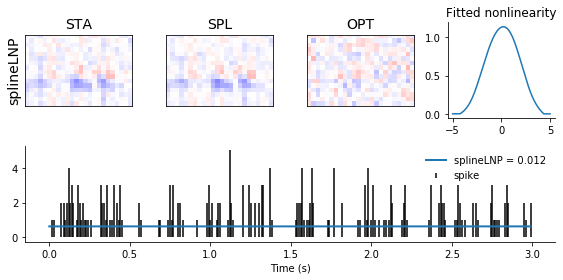

In [12]:
lnp.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
         num_iters=3000, verbose=300, beta=0.25, step_size=0.1, fit_nonlinearity=False)
plot2d(lnp, X_test, y_test, dt=dt, len_time=3)

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     3.171	-53823.285	 -7203.655	     0.195	     0.202
  300	    47.697	-224465.192	-29688.986	     0.225	     0.229
  600	    94.011	-227095.930	-30069.419	     0.286	     0.301
  900	   140.375	-227300.592	-30104.732	     0.288	     0.303
 1200	   187.388	-227431.769	-30119.862	     0.291	     0.305
 1500	   233.487	-227607.565	-30138.679	     0.295	     0.309
 1800	   279.568	-227832.321	-30162.573	     0.300	     0.313
 2100	   325.907	-228097.782	-30189.903	     0.305	     0.317
 2400	   372.934	-228388.104	-30218.030	     0.312	     0.322
 2700	   421.493	-228689.130	-30242.804	     0.319	     0.326
Stop: reached 3000 steps.

Total time elapsed: 470.329 s.


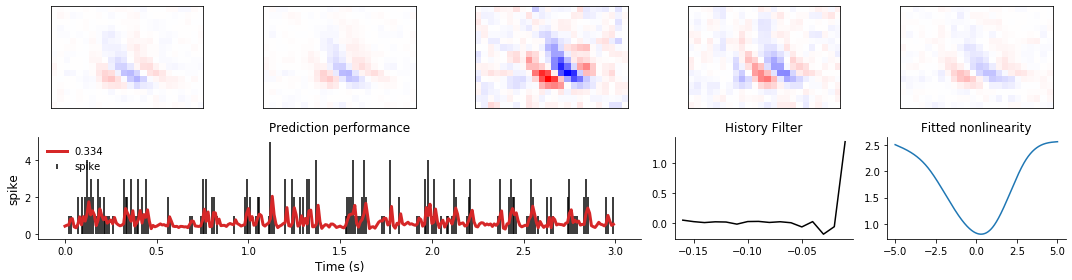

In [18]:
lnln_pos = splineLNLN(X_train, y_train, dims=dims, dt=dt, df=df)
lnln_pos.fit_nonparametric_nonlinearity(w=lnp.w_stc_pos[:, 1])
lnln_pos.initialize_parametric_nonlinearity(init_to='nonparametric', method='spline', params_dict={'df': 6})
lnln_pos.initialize_history_filter(dims=dims[0], df=df[0])
lnln_pos.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
         num_subunits=5, num_iters=3000, verbose=300, tolerance=10,
         beta=0.1, step_size=0.1,
         fit_history_filter=True)
plot_subunits2d(lnln_pos, X_test, y_test, dt=dt, len_time=3)

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     2.447	-62057.392	 -8266.766	     0.194	     0.202
  300	    49.362	-224089.744	-29631.367	     0.208	     0.215
  600	    98.380	-226275.646	-29954.885	     0.266	     0.281
  900	   148.403	-226376.793	-29974.080	     0.268	     0.282
Stop at 1197 steps: cost (dev) has been monotonically increasing for 10 steps.

Total time elapsed: 199.069 s.


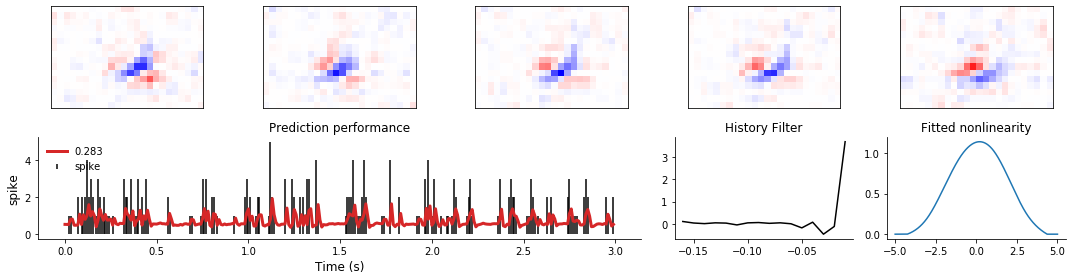

In [21]:
lnln_neg = splineLNLN(X_train, y_train, dims=dims, dt=dt, df=df)
lnln_neg.fit_nonparametric_nonlinearity(w=lnp.w_stc_neg[:, -1])
lnln_neg.initialize_parametric_nonlinearity(init_to='nonparametric', method='spline', params_dict={'df': 6})
lnln_neg.initialize_history_filter(dims=dims[0], df=df[0])
lnln_neg.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
         num_subunits=5, num_iters=3000, verbose=300, tolerance=10,
         beta=0.1, step_size=0.1,
         fit_history_filter=True)
plot_subunits2d(lnln_neg, X_test, y_test, dt=dt, len_time=3)

However, the model with best predictive performance is the one with fixed softplus nonlinearity.

Iters	  Time (s)	Cost (train)	Cost (dev)	Metric (train)	Metric (dev)
    0	     2.162	-50340.681	 -6743.337	     0.199	     0.203
  300	    23.622	-225078.248	-29737.170	     0.248	     0.243
  600	    47.330	-230323.391	-30477.990	     0.364	     0.369
  900	    71.126	-233298.276	-30843.063	     0.411	     0.412
 1200	    94.696	-235268.139	-31058.920	     0.441	     0.440
 1500	   118.399	-235821.669	-31107.512	     0.450	     0.447
 1800	   142.138	-235957.605	-31112.974	     0.452	     0.448
 2100	   165.767	-236048.221	-31115.857	     0.453	     0.449
 2400	   189.586	-236133.033	-31118.420	     0.454	     0.449
 2700	   213.103	-236215.931	-31128.801	     0.454	     0.450
Stop: reached 3000 steps.

Total time elapsed: 237.811 s.


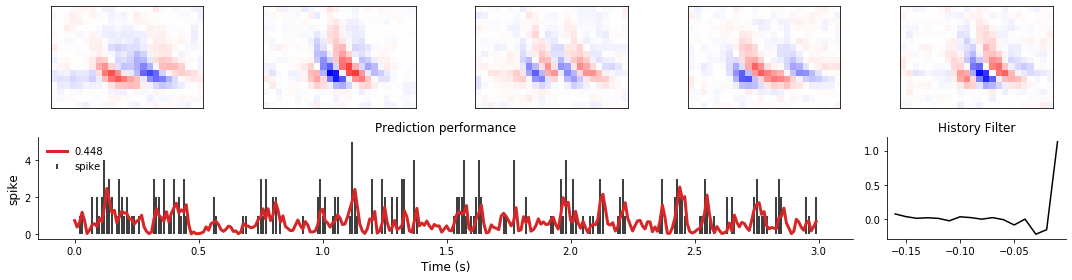

In [20]:
lnln = splineLNLN(X_train, y_train, dims=dims, dt=dt, df=df)
lnln.initialize_history_filter(dims=dims[0], df=df[0])
lnln.fit(extra={'X': X_dev, 'y': y_dev}, metric='corrcoef', 
         num_subunits=5, num_iters=3000, verbose=300, tolerance=10,
         beta=0.1, step_size=0.1,
         fit_history_filter=True)
plot_subunits2d(lnln, X_test, y_test, dt=dt, len_time=3)